# **결측값(missing data)의 처리**

누락된 데이터는 데이터 분석 애플리케이션에서 흔히 발생한다. Pandas의 목표 중 하나는 누락된 데이터에 대한 처리를 가능한 한 쉽게 만드는 것이다. 예를 들어, Pandas 객체에 대한 모든 설명(descriptive) 통계는 기본적으로 누락된 데이터를 제외한다.
Pandas 객체에서 누락된 데이터가 표현되는 방식은 다소 불완전하지만 대부분의 실제 사용에는 충분하다. pandas는 센티널(sentinel) 값이라고 부르는 부동 소수점 값 `NaN(Not a Number)`을 사용하여 누락된 데이터를 표현한다.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Pandas는 `csv` 파일과 같은 기본 데이터 형식에서 누락된 값을 감지하여 처리하는 데 매우 능숙하다. 하지만 결측값이 데이터 파일에서 빈 칸으로 표시될 수도 있지만 `NULL`, `None`, `NA` 또는 `N/A` 등으로 표시될 수도 있고, 상황에 따라서는 -1이나 0 혹은 999와 같은 특정 정수 값으로 표시될 수도 있는 등 다양한 상황이 있을 수 있다. 이런 다양한 상황에서 결측값을 적절히 처리하는 것은 매우 중요하다. 우선 아래의 예를 보자. 이 데이터 파일은 [여기](https://www.dropbox.com/s/3wecbkr5nhxx2uf/missing_values.csv?dl=0)에서 다운로드할 수 있다.

In [ ]:
path = '/content/drive/MyDrive/DataScience2023/chap04_pandas/datasets/missing_values.csv'

In [ ]:
with open(path) as f:
  for line in f:
    print(line)

Id,Mid,Final,Assignment,Project,Enroll

1,64,34.9,B,Pass,Yes

2,67,105.9,A,Pass,Yes

3,,83.1,,Fail,Yes

4,49,NULL,,Pass,

5,95,93.4,A,Pass,Yes

6,93,NULL,A,Pass,None

7,56,102.9,,NA,Yes

8,None,86.5,C,N/A,Yes


`csv` 파일의 내용을 보면 결측값이 다양한 형태로 표현되어 있다. 이 `csv` 파일을 `read_csv` 함수로 읽어 `DataFrame`을 만들어 보자.

In [ ]:
df = pd.read_csv(path, index_col='Id')
df

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64,34.9,B,Pass,Yes
2,67,105.9,A,Pass,Yes
3,NaN,83.1,NaN,Fail,Yes
4,49,NaN,NaN,Pass,NaN
5,95,93.4,A,Pass,Yes
6,93,NaN,A,Pass,None
7,56,102.9,NaN,NaN,Yes
8,None,86.5,C,NaN,Yes


`csv` 파일에서 빈 셀, `NULL`, `NA`, `N/A` 등은 `read_csv`함수에 의해서 자동으로 `NaN`으로 표현되었음을 알 수 있다. 하지만 `None`은 그대로 문자열 `None`으로 인식되었다.

여기서 `NaN`은 'Not a Number'의 줄임말로 이를 센티널(sentinel) 값이라고 부르며 `np.isnan` 함수로 어떤 값이 `NaN`인지 여부를 판단할 수 있다.

In [ ]:
print(df.loc[3, 'Mid'], type(df.loc[3, 'Mid']))       # np.nan은 numpy.float64 타입이다.
print(df.loc[7, 'Project'], type(df.loc[7, 'Project']))       # np.nan은 numpy.float64 타입이다.
print(np.isnan(df.loc[7, 'Project']))                 # np.isnan 함수로 nan인지 검사한다.
print(df.loc[7, 'Project'] == 'NaN')                  # wrong
print(df.loc[7, 'Project'] == np.nan)                 # wrong

nan <class 'float'>
nan <class 'float'>
True
False
False


심지어는 두 `nan`값 사이의 동일성 비교도 성립하지 않는다.

In [ ]:
print(df.loc[3, 'Mid'] == df.loc[3, 'Mid'])

False


pandas의 `read_csv()` 함수에는 `na_values`라는 매개변수가 있어서 실제 데이터 파일에 있는 값들 중에 결측값으로 처리할 값들의 리스트를 지정할 수 있다. 아래의 예에서는 문자열 `None`을 결측값으로 추가 지정하였다.

In [ ]:
df = pd.read_csv(path, index_col='Id', na_values=['None'])
df

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
3,NaN,83.1,NaN,Fail,Yes
4,49.0,NaN,NaN,Pass,NaN
5,95.0,93.4,A,Pass,Yes
6,93.0,NaN,A,Pass,NaN
7,56.0,102.9,NaN,NaN,Yes
8,NaN,86.5,C,NaN,Yes


### 결측값과 관련된 함수들

| method | Description |
|--------|-------------|
|dropna | Filter axis labels based on whether values for each label have missing data, |
|   | with varying thresholds for how much missing data to tolerate. |
|fillna | Fill in missing data with some value or using an interpolation method such as"ffill"or"bfill". |
| isna | Return Boolean values indicating which values are missing/NA. |
|notna  | Negation ofisna, returnsTruefor non-NA values andFalsefor NA values. |


### 결측값의 제거

`isnull()` 혹은 `isna()` 함수를 사용하여 전체 DataFrame의 각 셀이 `NaN`인지 아닌지를 표시하는는 Boolean 마스크를 만들 수 있다. 이것은 데이터의 특정 열을 기반으로 행을 처리하는 데 유용할 수 있다.

In [ ]:
mask = df.isnull() # Equivalent to 'mask = df.isna()'
mask

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,True,False,True,False,False
4,False,True,True,False,True
5,False,False,False,False,False
6,False,True,False,False,True
7,False,False,True,True,False
8,True,False,False,True,False


또 다른 유용한 함수인 `dropna()` 함수로  누락된 데이터가 있는 행들을 삭제할 수 있다. 이때 매개변수 `how='any'`는 누락 데이터가 하나라도 있으면 그 행을 삭제하고, `how='all'`이면 모든 데이터가 누락인 행들만 삭제한다. 매개변수 `inplace=True`를 적용하여 실제로 DataFrame을 변경할 수 있다.

In [ ]:
df.dropna()     # In default, how='any'

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
5,95.0,93.4,A,Pass,Yes


In [ ]:
df.dropna(how='any')

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
5,95.0,93.4,A,Pass,Yes


In [ ]:
df.dropna(how='all')

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
3,NaN,83.1,NaN,Fail,Yes
4,49.0,NaN,NaN,Pass,NaN
5,95.0,93.4,A,Pass,Yes
6,93.0,NaN,A,Pass,NaN
7,56.0,102.9,NaN,NaN,Yes
8,NaN,86.5,C,NaN,Yes


`dropna`에서 매개변수 `axis`를 1로 설정하여 누락값이 있는 열을 삭제할 수도 있다. 예를 위해서 누락값이 전혀 없는 컬럼을 하나 추가하보자.

In [ ]:
df['Dummy'] = [0, 1, 2, 3, 4, 5, 6, 7]
df

,Mid,Final,Assignment,Project,Enroll,Dummy
Id,,,,,,
1,64.0,34.9,B,Pass,Yes,0
2,67.0,105.9,A,Pass,Yes,1
3,NaN,83.1,NaN,Fail,Yes,2
4,49.0,NaN,NaN,Pass,NaN,3
5,95.0,93.4,A,Pass,Yes,4
6,93.0,NaN,A,Pass,NaN,5
7,56.0,102.9,NaN,NaN,Yes,6
8,NaN,86.5,C,NaN,Yes,7


In [ ]:
df.dropna(axis='columns', how='any') # df.dropna(axis=1, how='any')

,Dummy
Id,
1,0
2,1
3,2
4,3
5,4
6,5
7,6
8,7


In [ ]:
# Dummy 컬럼을 삭제하여 원상태로 돌린다.
df.drop("Dummy", inplace=True, axis=1)
df

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
3,NaN,83.1,NaN,Fail,Yes
4,49.0,NaN,NaN,Pass,NaN
5,95.0,93.4,A,Pass,Yes
6,93.0,NaN,A,Pass,NaN
7,56.0,102.9,NaN,NaN,Yes
8,NaN,86.5,C,NaN,Yes


`dropna` 함수의 `subset` 매개변수를 이용하여 특정 컬럼에 누락된 값이 존재하는 행만 선택적으로 삭제할 수도 있다.

In [ ]:
df.dropna(subset=['Mid', 'Final'])

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
5,95.0,93.4,A,Pass,Yes
7,56.0,102.9,NaN,NaN,Yes


미등록 상태의 학생들을 테이블에서 제거해보자.

In [ ]:
df.dropna(subset=['Enroll'], inplace=True)
df

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
3,NaN,83.1,NaN,Fail,Yes
5,95.0,93.4,A,Pass,Yes
7,56.0,102.9,NaN,NaN,Yes
8,NaN,86.5,C,NaN,Yes


### 결측값 채우기

Pandas가 가지고 있는 편리한 기능 중 하나는 누락된 값을 채워주는 함수인 `fillna()`이다.
누락된 데이터를 특정한 값으로 채워준다. 예를 들어 위 테이블의 모든 누락된 값을 일괄적으로 0으로 채우려면 다음과 같이 한다.

In [ ]:
df.fillna(0, inplace=False)

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
3,0.0,83.1,0,Fail,Yes
5,95.0,93.4,A,Pass,Yes
7,56.0,102.9,0,0,Yes
8,0.0,86.5,C,0,Yes


아래와 같이 딕셔너리를 이용하여 원하는 컬럼만을 선택하여 컬럼마다 서로 다른 값으로 누락된 값을 채워줄 수도 있다.

In [ ]:
df.fillna(value={'Mid': 0, 'Final': 0, 'Assignment': 'F', 'Project': 'Fail'}, inplace=True)
df

,Mid,Final,Assignment,Project,Enroll
Id,,,,,
1,64.0,34.9,B,Pass,Yes
2,67.0,105.9,A,Pass,Yes
3,0.0,83.1,F,Fail,Yes
5,95.0,93.4,A,Pass,Yes
7,56.0,102.9,F,Fail,Yes
8,0.0,86.5,C,Fail,Yes


#### 인접한 값으로 결측값 채우기

때때로 결측값을 일괄적인 단일값으로 채우는 대신 인접한 값으로 채워야하는 경우가 있다. `fillna()` 함수의 매개변수 중에 `method` 매개변수를 `ffill` 혹은 `bfill`로 적절히 설정하여 이런 일을 할 수 있다.

예를 들어 LMS와 같은 온라인 학습 시스템의 로그 데이터를 살펴보자. 로그에는 일정 주기로(예를 들어 매 30초 마다) 각 사용자에 대해서 어떤 동영상을 시청중인지 그 동영상 내에서 어떤 위치를 보고 있는지 등의 정보가 기록된다. 데이터 파일은 [여기](https://drive.google.com/file/d/1TYNJCf5Qhstzml6_rN_Kh9HU5RipPzMV/view?usp=share_link)에서 다운로드한다.

In [ ]:
path2 = '/content/drive/MyDrive/DataScience2023/chap04_pandas/datasets/log.csv'
df = pd.read_csv(path2)
df.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,True,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


이 데이터에서 첫 번째 열은 Unix epoch 형식의 타임스탬프이고 다음 열은 사용자 이름이다. 3번째와 4번째 열은 각각 재생 중인 비디오와 재생 위치이다. 재생 위치가 1 증가함에 따라 타임 스탬프가 약 30초 정도 증가함을 알 수 있다.

Bob의 경우에는 시간이 지나도 재생 위치가 바뀌지 않는 것으로 보아 재생을 일시 중지하였음을 유추할 수 있다. 하지만 이런 사실을 알아내기는 쉽지 않은데 그 이유는 첫째로 위의 데이터가 시간순으로 정렬되어 있지 않기 때문이다. 병렬성이 높은 시스템에서 로그가 시간순으로 저장되지 않는 것은 흔한 일이다. 둘째로  paused인지 아닌지는 매 순간마다 기록되는 대신 상태 변화가 일어날 때만, 즉 Pause 버튼이나 Resume 버튼을 누를 때만 기록되며 결과적으로 paused 열의 대부분이 `NaN`이기 때문이다.

이제 이 테이블의 `paused` 열의 결측값들을 올바른 값들로 채워보자. 그러기 위해서 먼저 이 테이블의 행들을 시간 순서로 정렬해야 한다.




In [ ]:
# 타임스탬프를 인덱스로 승격한 후 인덱스를 기준으로 행들을 정렬한다.

df = df.set_index('time')
df = df.sort_index() # index가 아닌 다른 컴럼을 기준으로 정렬할 때는 df.sort_values(by='user')와 같이 한다.
df

,user,video,playback position,paused,volume
time,,,,,
1469974424,cheryl,intro.html,5,True,10.0
1469974424,sue,advanced.html,23,False,10.0
1469974454,cheryl,intro.html,6,NaN,NaN
1469974454,sue,advanced.html,24,NaN,NaN
1469974484,cheryl,intro.html,7,NaN,NaN
1469974514,cheryl,intro.html,8,NaN,NaN
1469974524,sue,advanced.html,25,NaN,NaN
1469974544,cheryl,intro.html,9,NaN,NaN
1469974554,sue,advanced.html,26,NaN,NaN


이제 이 테이블의 `paused` 열의 결측값들을 채워보자. `fillna()` 함수에서 매개변수 `method`를 `ffill`로 설정하면 결측값이 이전 행의 유효한 값으로 채워진다. 반대로 `bfill`은 다음 유효한 값으로 채워진다.

In [ ]:
df = df.fillna(method='ffill')
df

,user,video,playback position,paused,volume
time,,,,,
1469974424,cheryl,intro.html,5,True,10.0
1469974424,sue,advanced.html,23,False,10.0
1469974454,cheryl,intro.html,6,False,10.0
1469974454,sue,advanced.html,24,False,10.0
1469974484,cheryl,intro.html,7,False,10.0
1469974514,cheryl,intro.html,8,False,10.0
1469974524,sue,advanced.html,25,False,10.0
1469974544,cheryl,intro.html,9,False,10.0
1469974554,sue,advanced.html,26,False,10.0


얼핏 생각하면 잘 된것 같지만 사실은 문제가 있다. **무슨 문제일까?** 이 문제는 다음 강좌에서 다룬다.

### **예제:**  Stack Overflow Survey

Stack Overflow 설문조사 결과에서 개발자의 경력을 살펴보자자.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience2022/chap04/datasets/stackoverflow_survey/survey_results_public.csv', index_col='ResponseId')
schema_df = pd.read_csv('/content/drive/MyDrive/DataScience2022/chap04/datasets/stackoverflow_survey/survey_results_schema.csv', index_col='qid')

In [ ]:
df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [ ]:
df.columns

Index(['MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country',
       'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

`YearsCode`와 `YearsCodePro`라는 2개의 컬럼이 있다. 두 설문 문항의 정확한 차이를 알아보기 위해서 `schema_df`를 살펴보자.

In [ ]:
schema_df.set_index('qname', inplace=True)
schema_df

,question,force_resp,type,selector
qname,,,,
S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,Browser Meta Info,False,Meta,Browser
S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,Which of the following options best describes ...,True,MC,SAVR
Employment,Which of the following best describes your cur...,False,MC,MAVR
Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
US_State,<p>In which state or territory of the USA do y...,False,MC,DL
UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB


In [ ]:
schema_df.loc[['YearsCode', 'YearsCodePro'], 'question']

qname
YearsCode       Including any education, how many years have y...
YearsCodePro    NOT including education, how many years have y...
Name: question, dtype: object

In [ ]:
schema_df.loc['YearsCode', 'question']

'Including any education, how many years have you been coding in total?'

In [ ]:
schema_df.loc['YearsCodePro', 'question']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

특정 컬럼에 어떤 서로 다른 값이 있는지 알려면 `unique` 함수를 사용한다.

In [ ]:
df['YearsCodePro'].unique()

array([nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1',
       '16', 'Less than 1 year', '15', '3', '35', '7', '8', '17', '14',
       '26', '25', '20', '50', '34', '11', '24', '22', '13', '31', '23',
       '39', '41', '27', '28', '19', '33', 'More than 50 years', '37',
       '29', '32', '43', '40', '38', '45', '42', '46', '36', '44', '47',
       '48', '49'], dtype=object)

우선 `YearsCodePro` 컬럼의 값이 `NaN`인 모든 행들을 제거한다.

In [ ]:
df2 = df.dropna(subset=['YearsCodePro'])
df2['YearsCodePro'].unique()

array(['10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1', '16',
       'Less than 1 year', '15', '3', '35', '7', '8', '17', '14', '26',
       '25', '20', '50', '34', '11', '24', '22', '13', '31', '23', '39',
       '41', '27', '28', '19', '33', 'More than 50 years', '37', '29',
       '32', '43', '40', '38', '45', '42', '46', '36', '44', '47', '48',
       '49'], dtype=object)

## Replace함수를 이용한 Customized fill-in

`replace()` 함수를 이용하여 사용자 정의 채우기를 수행할 수도 있다. 간단한 예제를 살펴 보자.

In [ ]:
df = pd.DataFrame({'A': [1, 1, 2, 3, 4],
                   'B': [3, 6, 3, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df

,A,B,C
0,1,3,a
1,1,6,b
2,2,3,c
3,3,8,d
4,4,9,e


In [ ]:
# 모든 1을 100으로 채울 수 있다.
df.replace(1, 100)

,A,B,C
0,100,3,a
1,100,6,b
2,2,3,c
3,3,8,d
4,4,9,e


In [ ]:
# 두 개의 값을 동시에 변경할 수도 있다.
df.replace([1, 3], [100, 300])

,A,B,C
0,100,300,a
1,100,6,b
2,2,300,c
3,300,8,d
4,4,9,e


pandas에서는 정규표현식을 이용하여 값을 대치할 수도 있다. 위에서 다루었던 데이터를 다시 살펴보자.

In [ ]:
path2 = '/content/drive/MyDrive/DataScience2022/chap04/datasets/log.csv'
df = pd.read_csv(path2)
df.head()

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,True,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN


In [ ]:
df2 = df.replace(to_replace=".*\.html$", value="webpage", regex=True)
df2.head()

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,webpage,5,True,10.0
1,1469974454,cheryl,webpage,6,NaN,NaN
2,1469974544,cheryl,webpage,9,NaN,NaN
3,1469974574,cheryl,webpage,10,NaN,NaN
4,1469977514,bob,webpage,1,NaN,NaN


## **예제:**  Stack Overflow Survey (계속)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience2022/chap04/datasets/stackoverflow_survey/survey_results_public.csv', index_col='ResponseId')
schema_df = pd.read_csv('/content/drive/MyDrive/DataScience2022/chap04/datasets/stackoverflow_survey/survey_results_schema.csv', index_col='qid')

In [ ]:
df2 = df.dropna(subset=['YearsCodePro'])
df2['YearsCodePro'].unique()

array(['10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1', '16',
       'Less than 1 year', '15', '3', '35', '7', '8', '17', '14', '26',
       '25', '20', '50', '34', '11', '24', '22', '13', '31', '23', '39',
       '41', '27', '28', '19', '33', 'More than 50 years', '37', '29',
       '32', '43', '40', '38', '45', '42', '46', '36', '44', '47', '48',
       '49'], dtype=object)

`replace` 함수의 `to_replace` 매개변수에 딕셔너리를 제공하여 특정 컬럼의 값 만을 replace할 수 있다.

In [ ]:
df2 = df2.replace(to_replace={'YearsCodePro': {'Less than 1 year': '0'}})
df2 = df2.replace(to_replace={'YearsCodePro': {'More than 50 years': '50'}})
# df2 = df2.replace(to_replace={'YearsCodePro': {'Less than 1 year': '0'}, 'YearsCodePro': {'More than 50 years': '50'}})

In [ ]:
df2['YearsCodePro'].unique()

array(['10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1', '16',
       '0', '15', '3', '35', '7', '8', '17', '14', '26', '25', '20', '50',
       '34', '11', '24', '22', '13', '31', '23', '39', '41', '27', '28',
       '19', '33', '37', '29', '32', '43', '40', '38', '45', '42', '46',
       '36', '44', '47', '48', '49'], dtype=object)

`astype` 함수를 이용하여 데이터 타입을 정수로 변환한다.

In [ ]:
df2['YearsCodePro'] = df2['YearsCodePro'].astype(int)

In [ ]:
df2['YearsCodePro'].unique()

array([10,  4,  5,  6,  2, 30,  9, 18, 12, 21,  1, 16,  0, 15,  3, 35,  7,
        8, 17, 14, 26, 25, 20, 50, 34, 11, 24, 22, 13, 31, 23, 39, 41, 27,
       28, 19, 33, 37, 29, 32, 43, 40, 38, 45, 42, 46, 36, 44, 47, 48, 49])

최대값, 최소값, 평균 등의 통계적 값을 다음과 같이 계산할 수 있다. `agg`함수 혹은 `describe` 함수를 이용하여 원하는 통계값들을 한 번에 계산할 수 있다.

In [ ]:
print(df2['YearsCodePro'].max())
print(df2['YearsCodePro'].min())
print(df2['YearsCodePro'].mean())
print(df2['YearsCodePro'].median())

print('\n')
print(df2['YearsCodePro'].agg(['min', 'max', 'mean', 'median', 'std']))

print('\n')
print(df2['YearsCodePro'].describe())

print('\n')
print(df2.agg(['min', 'max', 'mean', 'median', 'std']))

print('\n')
print(df2.describe())

50
0
9.183481442760062
6.0


min        0.000000
max       50.000000
mean       9.183481
median     6.000000
std        8.261189
Name: YearsCodePro, dtype: float64


count    61216.000000
mean         9.183481
std          8.261189
min          0.000000
25%          3.000000
50%          6.000000
75%         13.000000
max         50.000000
Name: YearsCodePro, dtype: float64


                            MainBranch      Country  YearsCodePro  \
min     I am a developer by profession  Afghanistan      0.000000   
max                      None of these     Zimbabwe     50.000000   
mean                               NaN          NaN      9.183481   
median                             NaN          NaN      6.000000   
std                                NaN          NaN      8.261189   

           CompTotal  ConvertedCompYearly  
min     0.000000e+00         1.000000e+00  
max     1.000000e+74         4.524131e+07  
mean    2.140274e+69         1.185997e+05  
median  6.700000e+04         5

`max`, `min`, `mean` 등의 함수들은 사실 결측값이 있는 경우에도 동작한다. 이 함수들은 결측값을 그냥 무시한다.

In [ ]:
df['ConvertedCompYearly'].unique()

array([  62268.,      nan,   51552., ..., 4300000.,  160500.,  816816.])

In [ ]:
df['ConvertedCompYearly'].describe()

count    4.684400e+04
mean     1.184262e+05
std      5.272944e+05
min      1.000000e+00
25%      2.702500e+04
50%      5.621100e+04
75%      1.000000e+05
max      4.524131e+07
Name: ConvertedCompYearly, dtype: float64

다시 코딩 경력으로 돌아와서 년차별로 인원수를 카운팅을 해보자. `value_counts` 함수를 사용한다.

In [ ]:
count_years = df2['YearsCodePro'].value_counts().sort_index()
count_years

0     2699
1     3047
2     5472
3     5812
4     4803
5     5095
6     3804
7     3159
8     2844
9     1814
10    3780
11    1533
12    1733
13    1267
14    1092
15    2249
16     970
17     770
18     695
19     392
20    1835
21     765
22     653
23     525
24     435
25     907
26     321
27     236
28     222
29     146
30     527
31     156
32     186
33     148
34     104
35     256
36     114
37      91
38      78
39      43
40     152
41      38
42      52
43      31
44      29
45      34
46      13
47      13
48       9
49       5
50      62
Name: YearsCodePro, dtype: int64

카운팅 결과를 간단한 차트로 그려보자.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Number of Responders per Years of Coding')

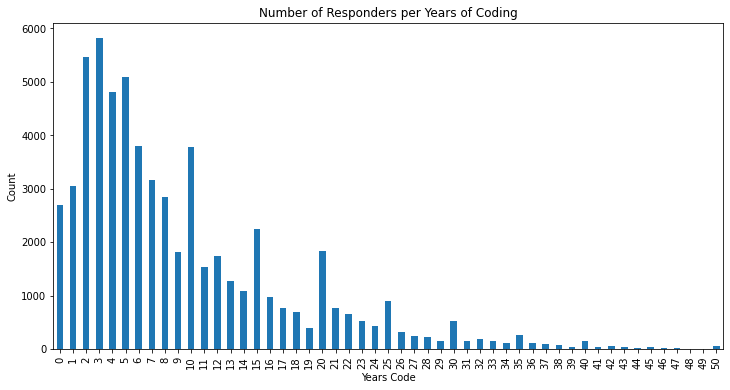

In [ ]:
ax = count_years.plot(kind='bar', figsize=(12,6))
ax.set_ylabel('Count')
ax.set_xlabel('Years Code')
ax.set_title('Number of Responders per Years of Coding')

Text(0.5, 1.0, 'Number of Responders per Years of Coding')

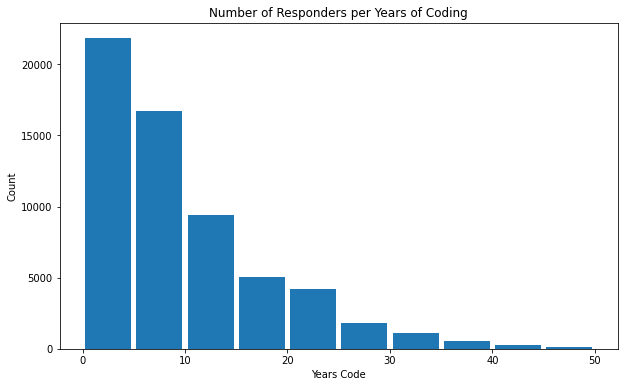

In [ ]:
ax = df2['YearsCodePro'].plot(kind='hist', bins=10, figsize=(10,6), rwidth=0.9)
ax.set_ylabel('Count')
ax.set_xlabel('Years Code')
ax.set_title('Number of Responders per Years of Coding')

## **실습과제**

Stack Overflow 설문조사 결과에서 연봉(`ConvertedCompYearly`)에 대해서도 비슷한 일을 해본다.